In [1]:
# Fetching the MNIST data "Hello World of Machine Learning"
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, parser = 'auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
x, y = mnist['data'], mnist['target']
print(x.shape)
print(y.shape) # There are 70,000 images and each image has 784 features

(70000, 784)
(70000,)


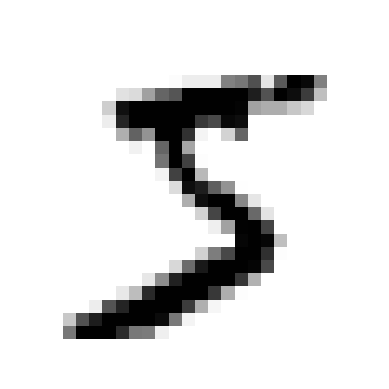

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
x_np = x.to_numpy()
some_digit = x_np[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
y[0]

'5'

In [5]:
# cast y to integers
import numpy as np
y = y.astype(np.uint8)
y[0]

5

In [6]:
x_train, x_test, y_train, y_test = x[:60000], x [60000:], y[:60000], y[60000:]
# Training set is already shuffled for us which guarantees that cross-validation folds should be similar

In [7]:
# Binary classifier for digit 5
# Create target vectors for classification
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state = 42)
sgd_classifier.fit(x_train, y_train_5)
# SGDclassifier relies on randomness
some_dig_reshape = some_digit.reshape(-1,1)
sgd_classifier.predict([some_digit])

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [8]:
# Implementing cross validation without using scikit learn's cross_val_score()
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits = 3)
x_train_np = np.array(x_train)
y_train_5_np = np.array(y_train_5)
for train_index, test_index in skfolds.split(x_train_np, y_train_5_np):
    clone_clf = clone(sgd_classifier)
    x_train_folds = x_train_np[train_index]
    y_train_folds = y_train_5_np[train_index]
    x_test_fold = x_train_np[test_index]
    y_test_fold = y_train_5_np[test_index]

    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))
''' StratifiedKFold classifier performs stratified sampling (which involves dividing the data into strata that share common characteristic
ensures each subgroup is represented, proportions of the strata in the sample reflect proportions of the strata in the overall population) to 
produce folds that contatin a representative ratio of each class
'''

0.95035
0.96035
0.9604


' StratifiedKFold classifier performs stratified sampling (which involves dividing the data into strata that share common characteristic\nensures each subgroup is represented, proportions of the strata in the sample reflect proportions of the strata in the overall population) to \nproduce folds that contatin a representative ratio of each class\n'

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, x_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [10]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype = bool)

In [11]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifier, x_train, y_train_5, cv = 3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [13]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # When it predicts an image represents a 5, only correct 83% of the tome

0.8370879772350012

In [14]:
recall_score(y_train_5,y_train_pred) # It only detects 65% of the the 5s

0.6511713705958311

In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [16]:
# Instead of calling predict(), call decision_function() which returns a decision score for each instance 
y_scores = sgd_classifier.decision_function([some_digit])
y_scores

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [17]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [18]:
# To decide what thrshold to use, use cross_val_predict while specifying to return scores instead of predictions
y_scores = cross_val_predict(sgd_classifier, x_train, y_train_5, cv = 3, method = 'decision_function')
# Compute the precision and recall for all all possible thresholds using precision_recall_curve
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [19]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
    plt.legend()
    plt.grid()
    plt.xlabel('Threshold')

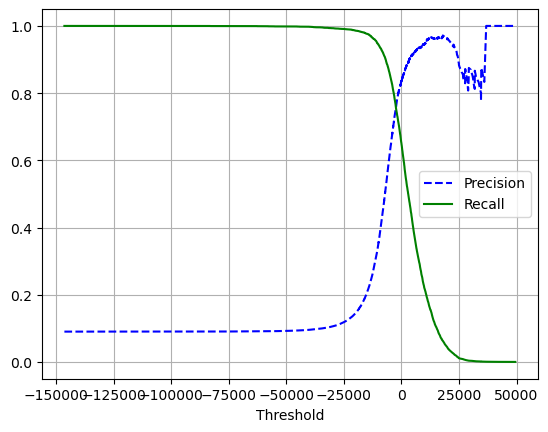

In [20]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [21]:
# Threshold 90 percent precision
thresh_90_p = thresholds[np.argmax(precisions >= 0.90)]
thresh_90_p

3370.0194991439557

In [22]:
# To make predictions, instead of calling predict()
y_train_pred_90 = (y_scores >= thresh_90_p)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, thresholds):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

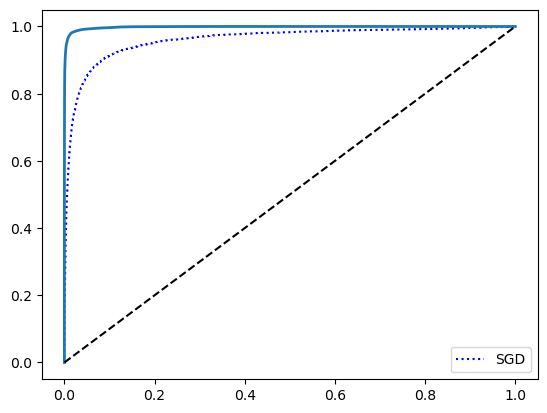

In [24]:
# Training a RandomForestClassifier
# Instead of a decision function, RF clf has predict_proba() which returns an array containg row per instance and column per class, each
# containing probability that the given instance belongs to the class
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv = 3, method = 'predict_proba')
y_scores_forest = y_probas_forest[:,1] # Score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


In [25]:
sgd_classifier.fit(x_train, y_train)
sgd_classifier.predict([some_digit])

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [26]:
some_digit_scores = sgd_classifier.decision_function([some_digit])
some_digit_scores

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [27]:
sgd_classifier.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [28]:
# Force to use OvO startegy
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([some_digit])

C:\Users\anush\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [29]:
len(ovo_clf.estimators_)

45

In [30]:
# Evaluate SGD Classifier's accuracy
cross_val_score(sgd_classifier, x_train, y_train, cv = 3, scoring = 'accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [31]:
# Scaling the inputs increases accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_classifier, x_train_scaled, y_train, cv = 3, scoring = 'accuracy')

array([0.8983, 0.891 , 0.9018])

In [32]:
y_train_pred = cross_val_predict(sgd_classifier, x_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, t_train_pred)
conf_mx

NameError: name 't_train_pred' is not defined

In [ ]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx/row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0) # Fill diagonals with 0s to keep only errors
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()